In [1]:
from fastai.collab import *
from fastai.tabular import *

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4576_1,4576,1,CI23714
1,4576_2,4576,2,CI23855
2,4576_3,4576,3,CI24917
3,4576_4,4576,4,CI23663
4,4576_5,4576,5,CI23933


In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

,user_sequence,user_id,challenge_sequence,challenge
0,4577_1,4577,1,CI23855
1,4577_2,4577,2,CI23933
2,4577_3,4577,3,CI24917
3,4577_4,4577,4,CI24915
4,4577_5,4577,5,CI23714


In [5]:
train = df_train.append(df_test)
train.shape

(1301236, 4)

In [6]:
cols = ['user_sequence','challenge_sequence']
train.drop(cols,axis=1,inplace=True)
train['rating']=1
train.head()

,user_id,challenge,rating
0,4576,CI23714,1
1,4576,CI23855,1
2,4576,CI24917,1
3,4576,CI23663,1
4,4576,CI23933,1


In [22]:
y_range = [-0.1,1.1]

In [23]:
data = CollabDataBunch.from_df(train, seed=42, user_name = 'user_id', item_name = 'challenge', rating_name = 'rating')

In [24]:
learn = collab_learner(data, n_factors=50, y_range=y_range,)

In [25]:
data.show_batch()

user_id,challenge,target
10044,CI23855,1.0
65234,CI23546,1.0
63562,CI24875,1.0
77842,CI26892,1.0
40192,CI23691,1.0


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


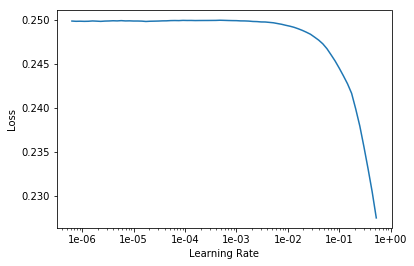

In [26]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [28]:
learn.fit_one_cycle(3, 1e-1, wd=1e-1)

epoch,train_loss,valid_loss,time
0,0.032610,0.033621,57:08
1,0.025813,0.025713,1:04:23
2,0.015469,0.014941,55:59


In [29]:
learn.save('1')

In [30]:
challange = pd.read_csv('challenge_data.csv')
challange.head()

,challenge_ID,programming_language,challenge_series_ID,total_submissions,publish_date,author_ID,author_gender,author_org_ID,category_id
0,CI23478,2,SI2445,37.0,06-05-2006,AI563576,M,AOI100001,NaN
1,CI23479,2,SI2435,48.0,17-10-2002,AI563577,M,AOI100002,32.0
2,CI23480,1,SI2435,15.0,16-10-2002,AI563578,M,AOI100003,NaN
3,CI23481,1,SI2710,236.0,19-09-2003,AI563579,M,AOI100004,70.0
4,CI23482,2,SI2440,137.0,21-03-2002,AI563580,M,AOI100005,NaN


In [31]:
users_list_test=df_test['user_id'].unique()
#challange_list=challange['challenge_ID'].unique()
challange_list=train['challenge'].unique()

In [32]:
len(challange_list)

5502

In [33]:
challange_list_test=df_test['challenge'].unique()

In [34]:
print(len(users_list_test))
print(len(challange_list))

39732
5502


In [35]:
rows = []
for i in range(len(challange_list)):
  rows.append(dict({'challenge': challange_list[i], 'user_id' : 4577}))
test_data = pd.DataFrame(rows)

In [36]:
data_test = CollabDataBunch.from_df(train, test = test_data, user_name = 'user_id', item_name = 'challenge', rating_name = 'rating', seed=42)
learn = collab_learner(data_test, n_factors=50, y_range=y_range,)
learn = learn.load('1')

In [37]:
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [38]:
for idx, (score, name) in enumerate(sorted(zip(preds, challange_list), reverse=True)):
    if idx >= 10:
        break
    print("Score: ", float(score), " for challange: ", name)

Score:  0.9999278783798218  for challange:  CI24958
Score:  0.9999215602874756  for challange:  CI23714
Score:  0.9998064041137695  for challange:  CI25135
Score:  0.9997743368148804  for challange:  CI24917
Score:  0.9996370077133179  for challange:  CI24876
Score:  0.9996259212493896  for challange:  CI24527
Score:  0.999531626701355  for challange:  CI25075
Score:  0.9995100498199463  for challange:  CI23691
Score:  0.9994972944259644  for challange:  CI23855
Score:  0.9994819164276123  for challange:  CI23663


In [ ]:
predictions = []
for j in range(7715,len(users_list_test)):
  rows = []
  print("User: ", j , "User_ID: ", users_list_test[j])
  for i in range(len(challange_list)):
    rows.append(dict({'challenge': challange_list[i], 'user_id' : users_list_test[j]}))
  test_data = pd.DataFrame(rows)
  data_test = CollabDataBunch.from_df(train, test = test_data, user_name = 'user_id', item_name = 'challenge', rating_name = 'rating', seed=42)
  learn = collab_learner(data_test, n_factors=50, y_range=y_range,)
  learn = learn.load('1')
  preds, y = learn.get_preds(ds_type=DatasetType.Test)
  for idx, (score, name) in enumerate(sorted(zip(preds, challange_list), reverse=True)):
    if idx >= 13:
      break
    predictions.append(dict({'user_id' : users_list_test[j], 'challenge': name, 'Score' :  float(score)}))

test_preds = pd.DataFrame(predictions)

User:  7715 User_ID:  25615


User:  7716 User_ID:  25616


User:  7717 User_ID:  25619


User:  7718 User_ID:  25620


User:  7719 User_ID:  25622


User:  7720 User_ID:  25626


User:  7721 User_ID:  25628


User:  7722 User_ID:  25631


User:  7723 User_ID:  25633


User:  7724 User_ID:  25634


User:  7725 User_ID:  25642


User:  7726 User_ID:  25648


User:  7727 User_ID:  25653


User:  7728 User_ID:  25655


User:  7729 User_ID:  25657


User:  7730 User_ID:  25659


User:  7731 User_ID:  25660


User:  7732 User_ID:  25662


User:  7733 User_ID:  25664


User:  7734 User_ID:  25665


User:  7735 User_ID:  25667


User:  7736 User_ID:  25668


User:  7737 User_ID:  25672


User:  7738 User_ID:  25677


User:  7739 User_ID:  25678


User:  7740 User_ID:  25680


User:  7741 User_ID:  25682


User:  7742 User_ID:  25690


User:  7743 User_ID:  25695


User:  7744 User_ID:  25696


User:  7745 User_ID:  25698


User:  7746 User_ID:  25700


User:  7747 User_ID:  25701


User:  7748 User_ID:  25709


User:  7749 User_ID:  25710


User:  7750 User_ID:  25711


User:  7751 User_ID:  25712


User:  7752 User_ID:  25714


User:  7753 User_ID:  25715


User:  7754 User_ID:  25716


User:  7755 User_ID:  25722


User:  7756 User_ID:  25728


User:  7757 User_ID:  25736


User:  7758 User_ID:  25742


User:  7759 User_ID:  25743


User:  7760 User_ID:  25745


User:  7761 User_ID:  25752


User:  7762 User_ID:  25757


User:  7763 User_ID:  25760


User:  7764 User_ID:  25764


User:  7765 User_ID:  25765


User:  7766 User_ID:  25771


User:  7767 User_ID:  25774


User:  7768 User_ID:  25776


User:  7769 User_ID:  25785


User:  7770 User_ID:  25789


User:  7771 User_ID:  25793


User:  7772 User_ID:  25796


User:  7773 User_ID:  25797


User:  7774 User_ID:  25799


User:  7775 User_ID:  25801


User:  7776 User_ID:  25805


User:  7777 User_ID:  25806


User:  7778 User_ID:  25811


User:  7779 User_ID:  25813


User:  7780 User_ID:  25814


User:  7781 User_ID:  25815


User:  7782 User_ID:  25818


User:  7783 User_ID:  25819


User:  7784 User_ID:  25821


User:  7785 User_ID:  25822


User:  7786 User_ID:  25823


User:  7787 User_ID:  25824


User:  7788 User_ID:  25826


User:  7789 User_ID:  25833


User:  7790 User_ID:  25836


User:  7791 User_ID:  25839


User:  7792 User_ID:  25843


User:  7793 User_ID:  25845


User:  7794 User_ID:  25846


User:  7795 User_ID:  25848


User:  7796 User_ID:  25850


User:  7797 User_ID:  25852


User:  7798 User_ID:  25853


User:  7799 User_ID:  25855


User:  7800 User_ID:  25856


User:  7801 User_ID:  25859


User:  7802 User_ID:  25860


User:  7803 User_ID:  25863


User:  7804 User_ID:  25865


User:  7805 User_ID:  25867


User:  7806 User_ID:  25870


User:  7807 User_ID:  25873


User:  7808 User_ID:  25875


User:  7809 User_ID:  25878


User:  7810 User_ID:  25880


User:  7811 User_ID:  25882


User:  7812 User_ID:  25886


User:  7813 User_ID:  25891


User:  7814 User_ID:  25894


User:  7815 User_ID:  25896


User:  7816 User_ID:  25897


User:  7817 User_ID:  25898


User:  7818 User_ID:  25902


User:  7819 User_ID:  25903


User:  7820 User_ID:  25905


User:  7821 User_ID:  25911


User:  7822 User_ID:  25912


User:  7823 User_ID:  25913


User:  7824 User_ID:  25920


User:  7825 User_ID:  25923


User:  7826 User_ID:  25925


User:  7827 User_ID:  25933


User:  7828 User_ID:  25955


User:  7829 User_ID:  25957


User:  7830 User_ID:  25961


User:  7831 User_ID:  25962


User:  7832 User_ID:  25963


User:  7833 User_ID:  25965


User:  7834 User_ID:  25966


User:  7835 User_ID:  25969


User:  7836 User_ID:  25971


User:  7837 User_ID:  25976


User:  7838 User_ID:  25977


User:  7839 User_ID:  25982


User:  7840 User_ID:  25984


User:  7841 User_ID:  25989


User:  7842 User_ID:  25996


User:  7843 User_ID:  25997


User:  7844 User_ID:  25999


User:  7845 User_ID:  26000


User:  7846 User_ID:  26002


User:  7847 User_ID:  26003


User:  7848 User_ID:  26008


User:  7849 User_ID:  26011


User:  7850 User_ID:  26015


User:  7851 User_ID:  26016


User:  7852 User_ID:  26017


User:  7853 User_ID:  26018


User:  7854 User_ID:  26019


User:  7855 User_ID:  26022


User:  7856 User_ID:  26024


User:  7857 User_ID:  26028


User:  7858 User_ID:  26029


User:  7859 User_ID:  26030


User:  7860 User_ID:  26031


User:  7861 User_ID:  26033


User:  7862 User_ID:  26034


User:  7863 User_ID:  26038


User:  7864 User_ID:  26042


User:  7865 User_ID:  26053


User:  7866 User_ID:  26058


User:  7867 User_ID:  26059


User:  7868 User_ID:  26060


User:  7869 User_ID:  26068


User:  7870 User_ID:  26069


User:  7871 User_ID:  26070


User:  7872 User_ID:  26081


User:  7873 User_ID:  26084


User:  7874 User_ID:  26089


User:  7875 User_ID:  26095


User:  7876 User_ID:  26096


User:  7877 User_ID:  26098


User:  7878 User_ID:  26107


User:  7879 User_ID:  26109


User:  7880 User_ID:  26111


User:  7881 User_ID:  26115


User:  7882 User_ID:  26119


User:  7883 User_ID:  26125


User:  7884 User_ID:  26128


User:  7885 User_ID:  26131


User:  7886 User_ID:  26132


User:  7887 User_ID:  26134


User:  7888 User_ID:  26136


User:  7889 User_ID:  26141


User:  7890 User_ID:  26142


User:  7891 User_ID:  26143


User:  7892 User_ID:  26145


User:  7893 User_ID:  26152


User:  7894 User_ID:  26160


User:  7895 User_ID:  26164


User:  7896 User_ID:  26165


User:  7897 User_ID:  26167


User:  7898 User_ID:  26168


User:  7899 User_ID:  26171


User:  7900 User_ID:  26179


User:  7901 User_ID:  26180


User:  7902 User_ID:  26181


User:  7903 User_ID:  26184


User:  7904 User_ID:  26185


User:  7905 User_ID:  26186


User:  7906 User_ID:  26188


User:  7907 User_ID:  26193


User:  7908 User_ID:  26195


User:  7909 User_ID:  26201


User:  7910 User_ID:  26202


User:  7911 User_ID:  26203


User:  7912 User_ID:  26205


User:  7913 User_ID:  26207


User:  7914 User_ID:  26211


User:  7915 User_ID:  26212


User:  7916 User_ID:  26213


User:  7917 User_ID:  26217


User:  7918 User_ID:  26218


User:  7919 User_ID:  26221


User:  7920 User_ID:  26222


User:  7921 User_ID:  26224


User:  7922 User_ID:  26228


User:  7923 User_ID:  26229


User:  7924 User_ID:  26232


User:  7925 User_ID:  26234


User:  7926 User_ID:  26236


User:  7927 User_ID:  26238


User:  7928 User_ID:  26239


User:  7929 User_ID:  26240


User:  7930 User_ID:  26241


User:  7931 User_ID:  26242


User:  7932 User_ID:  26245


User:  7933 User_ID:  26248


User:  7934 User_ID:  26251


User:  7935 User_ID:  26253


User:  7936 User_ID:  26254


User:  7937 User_ID:  26255


User:  7938 User_ID:  26256


User:  7939 User_ID:  26258


User:  7940 User_ID:  26259


User:  7941 User_ID:  26262


User:  7942 User_ID:  26265


User:  7943 User_ID:  26275


User:  7944 User_ID:  26276


User:  7945 User_ID:  26277


User:  7946 User_ID:  26285


User:  7947 User_ID:  26288


User:  7948 User_ID:  26296


User:  7949 User_ID:  26298


User:  7950 User_ID:  26306


User:  7951 User_ID:  26307


User:  7952 User_ID:  26311


User:  7953 User_ID:  26320


User:  7954 User_ID:  26327


User:  7955 User_ID:  26329


User:  7956 User_ID:  26330


User:  7957 User_ID:  26331


User:  7958 User_ID:  26332


User:  7959 User_ID:  26340


User:  7960 User_ID:  26341


User:  7961 User_ID:  26343


User:  7962 User_ID:  26346


User:  7963 User_ID:  26350


User:  7964 User_ID:  26351


User:  7965 User_ID:  26353


User:  7966 User_ID:  26355


In [ ]:
predictions[-1]

{'Score': 1.0006930828094482, 'challenge': 'CI23848', 'user_id': 25609}

In [ ]:
users_list_test[7714]

25609

In [ ]:
import itertools
l=itertools.product(users_list_test.tolist(),challange_list.tolist())

In [ ]:
user_challange_test = pd.DataFrame(data=l,columns=['user_id','challenge'])

In [ ]:
user_challange_test['user_Challange'] = pd.concat(user_challange_test['user_id'],user_challange_test['challenge'])
user_challange_test.head()

In [ ]:
df_test['user_Challange'] = df_test['user_id'].astype(str)+df_test['challenge']
df_test.head()

In [ ]:
len(df_test['user_Challange'].unique())

397320

In [ ]:
test_extract=user_challange_test[~user_challange_test['user_Challange'].isin(df_test['user_Challange'])]